***Importing Libraries***


In [2]:
#Base Libraries
import pandas as pd
import numpy as np
np.random.seed(42)   ## so that output would be same
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier as RFC

#processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


***Load Data***

In [3]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [4]:
import io
DiabetesDFrame = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
#Ref::: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

***EDA***



In [5]:
print("Shape of DataFrame>>",DiabetesDFrame.shape)
DiabetesDFrame.head(10)

Shape of DataFrame>> (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
DiabetesDFrame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
DiabetesDFrame['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
DiabetesDFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
X=DiabetesDFrame.drop(columns='Outcome',axis=1)
Y=DiabetesDFrame['Outcome']

In [10]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
Y.describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [12]:
#CORRELATION MATRIX

DiabetesDFrame.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.05, 'Correlation matrix of squared correlations \n')

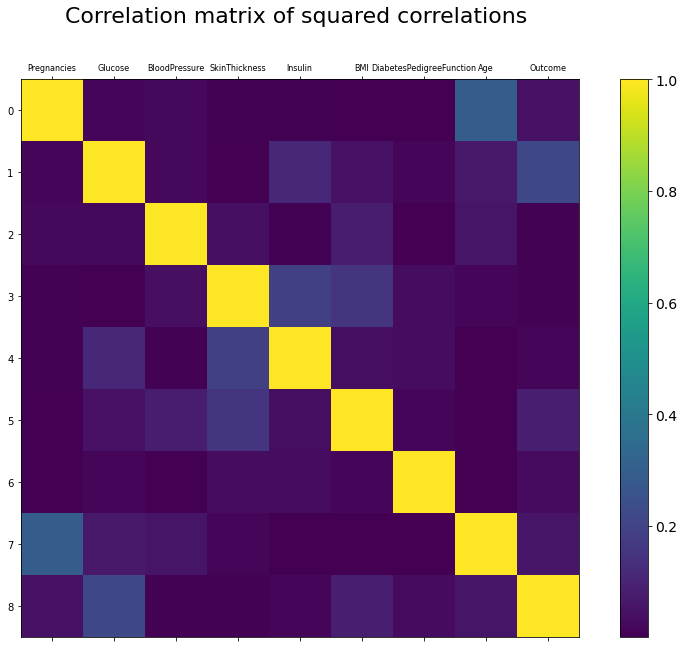

In [13]:
fig=plt.figure(figsize=(15,10))
plt.matshow(DiabetesDFrame.corr()**2,fignum=fig.number)
plt.xticks(range(DiabetesDFrame.shape[1]),DiabetesDFrame.columns,fontsize=8)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation matrix of squared correlations \n",fontsize=22)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

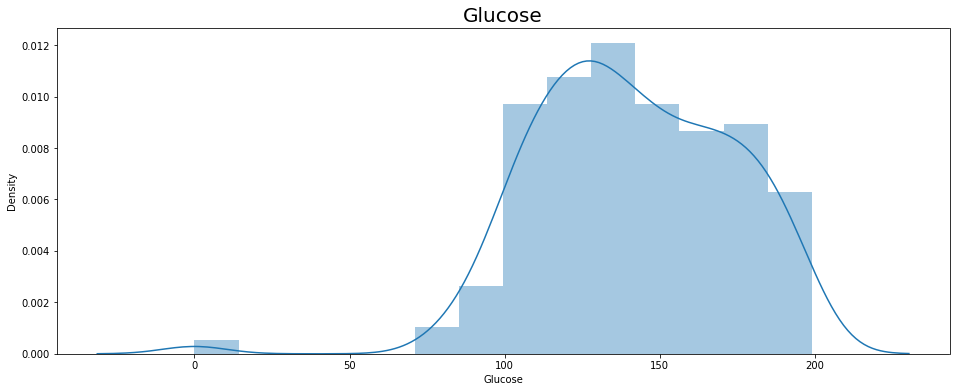

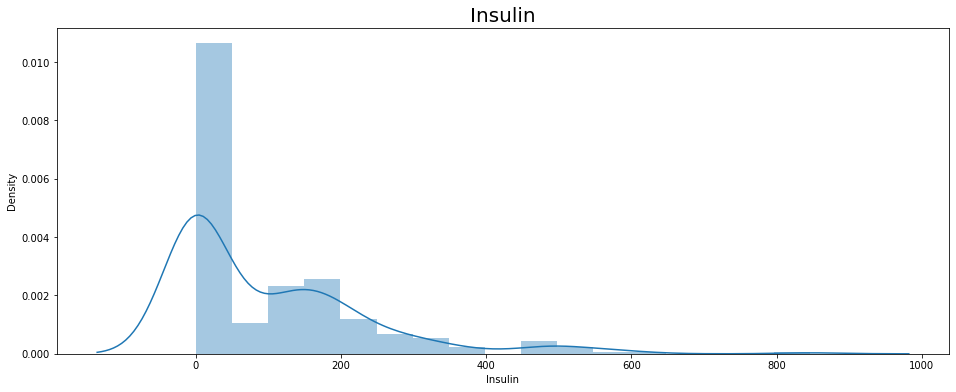

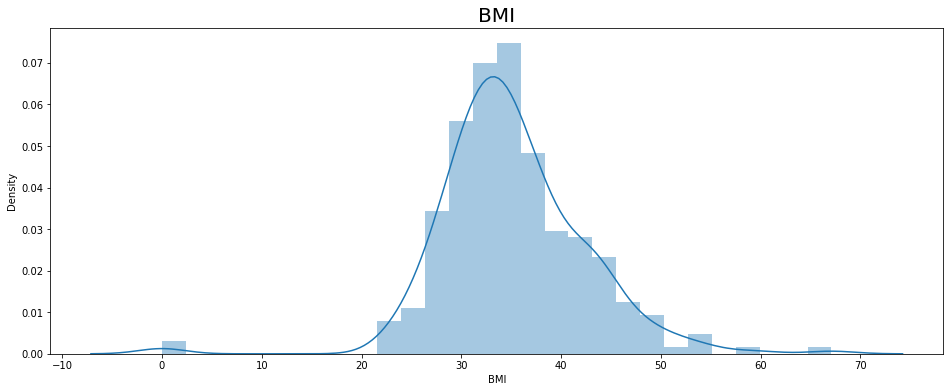

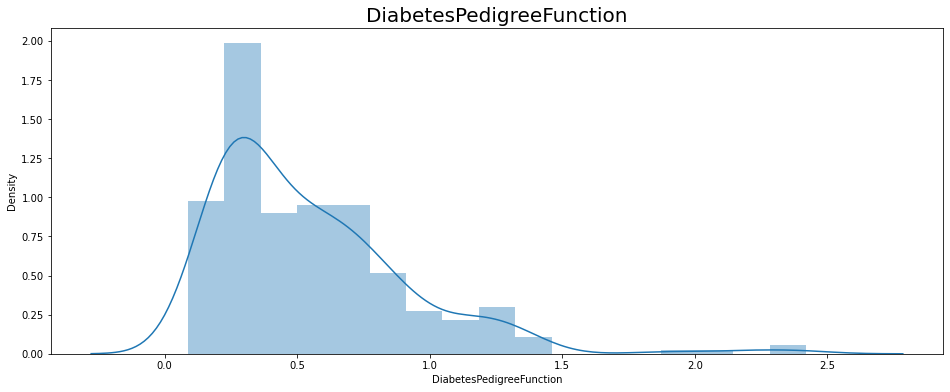

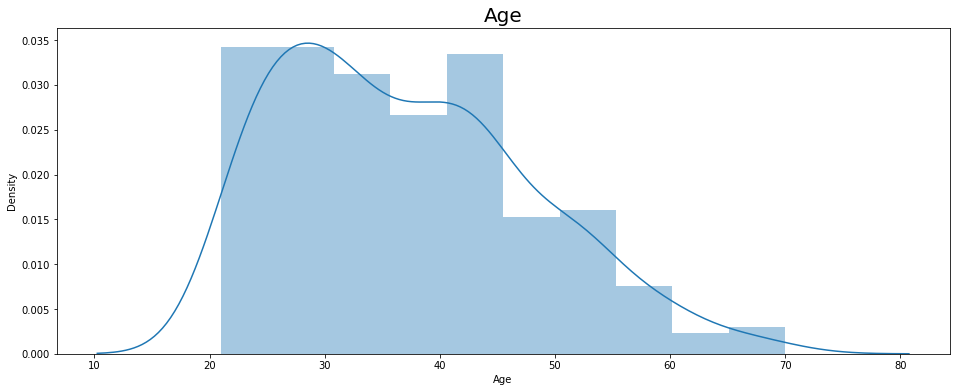

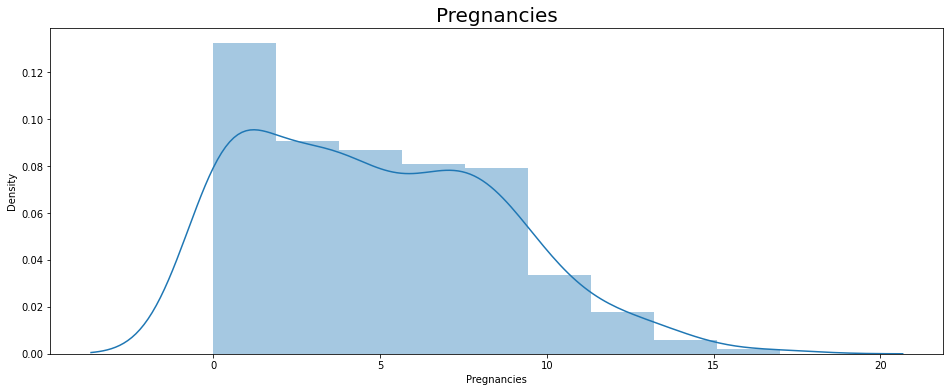

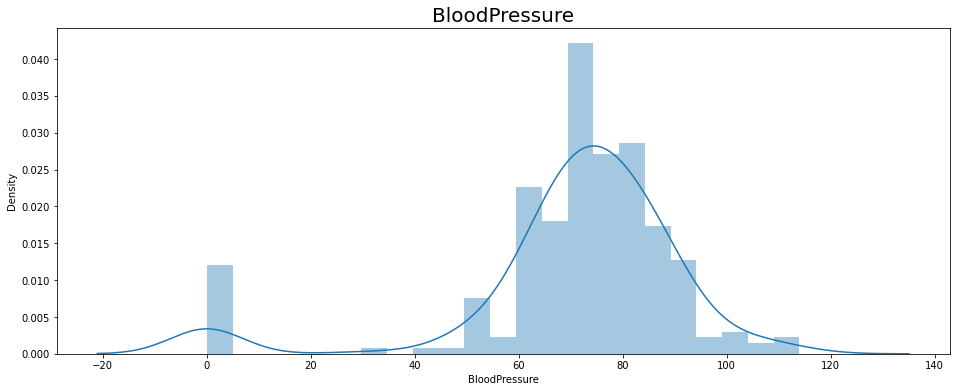

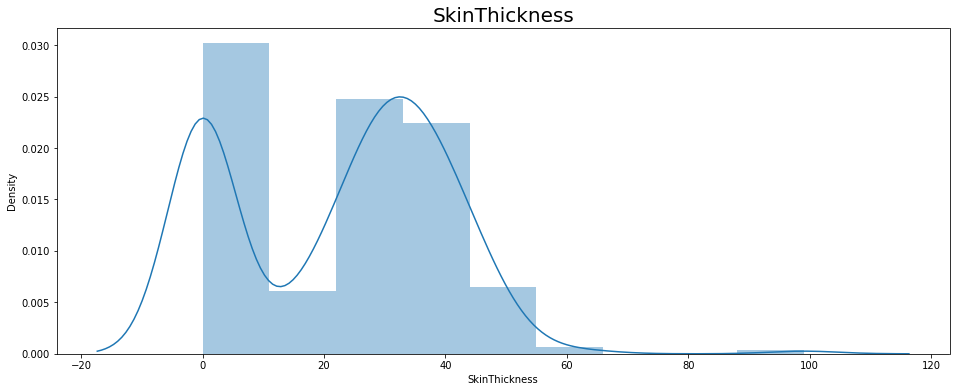

In [14]:
#Analyse Feature Output relation by seaborn plots
Features=['Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age',"Pregnancies","BloodPressure","SkinThickness"]
for feature in Features:
    fig = plt.figure(figsize =(16,6))
    sns.distplot(DiabetesDFrame[feature][DiabetesDFrame["Outcome"]==1])
    plt.xticks()
    plt.title(feature,fontsize = 20)


In [15]:
X=DiabetesDFrame.drop(["Pregnancies","BloodPressure","SkinThickness","Outcome"],axis = 1)
y=DiabetesDFrame.iloc[:,-1]

In [16]:
TrainX,ValX,TrainY,ValY=train_test_split(X,y,test_size=0.2,random_state=2,stratify=Y)


print("X_train size:", TrainX.shape)
print("y_train size: ",TrainY.shape,"\n")
print("X_Val size:", ValX.shape)
print("y_Val size:",ValY.shape)

X_train size: (614, 5)
y_train size:  (614,) 

X_Val size: (154, 5)
y_Val size: (154,)


In [17]:
#Standard Scaling
Sc=StandardScaler()
TrainX=Sc.fit_transform(TrainX)
ValX=Sc.fit_transform(ValX)

#DF to Array

In [18]:
TrainX

array([[-0.07971099, -0.70188945,  0.02825037, -0.98159708, -0.7885233 ],
       [-0.52091877, -0.12789497, -0.17184452, -1.03823795,  0.31879426],
       [ 2.12632792,  6.43927725, -0.25938604, -0.21545477,  2.19271628],
       ...,
       [-1.15121561, -0.70188945, -0.25938604, -0.50760242,  0.14843771],
       [-0.30031488, -0.70188945,  0.90366551, -0.69839272,  0.40397253],
       [-1.11970076, -0.70188945,  0.45345201, -0.69243053, -0.70334503]])

In [19]:
ValX

array([[-0.37815374, -0.66543831, -0.74416577, -0.86623363, -0.52324347],
       [-0.16405199, -0.66543831, -1.20681739, -1.08018452, -0.94690011],
       [ 0.8758708 , -0.66543831,  0.33081888, -0.83110736,  2.69654703],
       [ 1.57934798,  1.58824534,  0.43967809, -0.39043239, -0.26904948],
       [-1.05104496, -0.66543831,  0.80707791, -0.67463581, -0.43851214],
       [-0.95928707,  0.08578957,  0.80707791,  0.09814204, -0.94690011],
       [ 0.63118308,  1.43799976, -1.24763959, -0.86623363, -1.03163144],
       [ 0.32532344, -0.66543831,  1.17447772,  0.28973986,  0.91718912],
       [-0.62284146,  1.23767233,  0.37164109, -0.15412842,  0.83245779],
       [ 0.47825326,  0.63669002,  0.56214469,  0.20352084, -0.35378081],
       [ 2.09930938,  1.40795065,  1.67795155,  1.77462292,  1.67977108],
       [-0.71459935, -0.66543831,  0.7526483 ,  0.02150291,  2.0186964 ],
       [-0.65342742, -0.66543831,  0.5893595 , -0.32017986,  1.59503975],
       [ 0.4476673 , -0.66543831,  1.2

***Building Model***

In [20]:
#KNN Model

Knn_Classifier=KNC(n_neighbors=21)
Knn_Classifier.fit(TrainX,TrainY)

Knn_Pred=Knn_Classifier.predict(ValX)

Knn_Conf_Mat=confusion_matrix(ValY,Knn_Pred)
print(Knn_Conf_Mat,"\n")


print("Correct:",sum(Knn_Pred == ValY))
print("Incorrect : ",sum(Knn_Pred != ValY))
print("Accuracy:",sum(Knn_Pred ==ValY)/len(Knn_Pred))

#Knn_Classifier.score(ValX,ValY)

[[90 10]
 [25 29]] 

Correct: 119
Incorrect :  35
Accuracy: 0.7727272727272727


In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++

In [21]:
#GaussainNB Model

NBClassifier=GNB()
NBClassifier.fit(TrainX,TrainY)

NBClassifier_Pred=NBClassifier.predict(ValX)

NBClassifier_Conf_Mat=confusion_matrix(NBClassifier_Pred,ValY)
print(NBClassifier_Conf_Mat,'\n')
print("Correct:",sum(NBClassifier_Pred == ValY))
print("Incorrect : ",sum(NBClassifier_Pred != ValY))
print("Accuracy:",sum(NBClassifier_Pred ==ValY)/len(NBClassifier_Pred))
#NBClassifier.score(ValX,ValY)

[[90 21]
 [10 33]] 

Correct: 123
Incorrect :  31
Accuracy: 0.7987012987012987


In [ ]:
#+++++++++++++++++++++++++++++++++++++++++++++++

In [22]:
#RandomFOrestClassifier

RFC_Model=RFC(max_depth=11,random_state=0)
RFC_Model.fit(TrainX,TrainY)

RFC_Pred=RFC_Model.predict(ValX)

RFC_Conf_Mat=confusion_matrix(RFC_Pred,ValY)
print(RFC_Conf_Mat,'\n')
print("Correct:",sum(RFC_Pred == ValY))
print("Incorrect : ",sum(RFC_Pred != ValY))
print("Accuracy:",sum(RFC_Pred ==ValY)/len(RFC_Pred))


[[85 19]
 [15 35]] 

Correct: 120
Incorrect :  34
Accuracy: 0.7792207792207793


**USER TESTING**

In [25]:

Glucose=int(input("Enter Glucose Level>>"))
Insulin=int(input("Enter Insulin Level>>"))
BMI=float(input("Enter BMI Level>>"))
DiabetesPedigreeFunction=float(input("Enter DiabetesPedigreeFunction>>"))
Age=int(input("Enter Age>>"))

print("\n")
Model=int(input("ENTER TYPE OF MODEL \n1].KNN\n2].GNB \n3].RFC\n"))
Data=(Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age)
arr=np.asarray(Data)
re_Arr=arr.reshape(1,-1)
Std_data=Sc.transform(re_Arr)

if Model==1:
    R=Knn_Classifier.predict(Std_data)
elif Model==2:
    R=NBClassifier.predict(Std_data)
else:
    R=RFC_Model.predict(Data)
if R==1:
    print("~> Daibetic")
else:
    print("~> Non Diabetic")  
    #183	0	23.3	0.672	32-->	1
    #115	0	35.3	0.134	29-->	0

Enter Glucose Level>>125
Enter Insulin Level>>0
Enter BMI Level>>0
Enter DiabetesPedigreeFunction>>0.232
Enter Age>>54


ENTER TYPE OF MODEL 
1].KNN
2].GNB 
3].RFC
1
~> Non Diabetic
